In [1]:
# Python imports
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def normalize(vec):
    return vec / np.linalg.norm(vec)

# Distant Supervision

This notebook has a few cute experiments to explore distant supervision.

## Data generation

Consider a random (unit) weights $w^*$.
Take a dataset of elements ${x_a, x_b}$ randomly generated and $y = w^* \cdot x$.

In [2]:
# Constants
D = 2
N = 100
K = 2

In [3]:
w = np.random.randn(D)
w = normalize(w)
theta = np.arctan2(w[0], w[1])

X = np.random.randn(N,D,K)
# Normalize
for i in range(N):
    for k in range(K):
        X[i].T[k] = normalize(X[i].T[k])
y = np.array([X[i].T[0].dot(w) for i in range(N)])

In [9]:
def avg_loss(X, y, w):
    loss = 0.
    for i, (x, y) in enumerate(zip(X,y)):
        loss_k = [abs(w.dot(x.T[k]) - y)**2 for k in range(K)]
        resp = [np.exp(-l) for l in loss_k]
        resp = resp / sum(resp)
        loss_ = sum(r * loss_ for (r, loss_) in zip(resp, loss_k))
        loss += (loss_ - loss)/(i+1)
    return loss

In [46]:
def avg_loss(X, y, w):
    loss = 0.
    for i, (x, y) in enumerate(zip(X,y)):
        loss_k = [abs(w.dot(x.T[k]) - y)**2 for k in range(K)]
        loss_ = np.min(loss_k)
        loss += (loss_ - loss)/(i+1)
    return loss

In [47]:
# Q1. What is the averaged objective?
avg_loss(X, y, w)

0.0

In [48]:
thetas = np.arange(-np.pi, np.pi, 0.01)

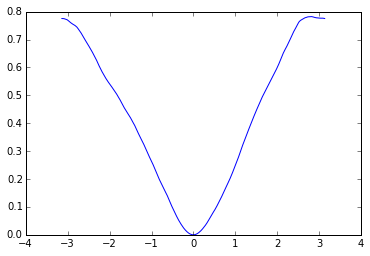

In [49]:
# Plot of values.
ws = np.array([np.sin(theta+thetas), np.cos(theta+thetas)]).T
losses = [avg_loss(X, y, w_) for w_ in ws]
plt.plot(thetas, losses)

In [50]:
print(thetas[314], losses[314])
print(thetas[315], losses[315])
print(thetas[np.argmin(losses)], losses[np.argmin(losses)])

-0.00159265358986 1.26307795464e-06
0.00840734641014 3.51976518817e-05
-0.00159265358986 1.26307795464e-06
